# Step 1. Develop an Understanding of the Data Mining Project

### Welcome to our data mining project on COVID-19 cases. As a lab, we have been interested in understanding the patterns and trends of COVID-19 cases across the world. The COVID-19 pandemic has affected all aspects of human life and has challenged our healthcare systems, economies, and social structures. 

### We wanted to create a model in order to help decrease the number of COVID-19 cases. 

# Step 2: Obtain the dataset to be used in the analysis

### The website Kaggle provided a dataset of 187 countries (95% of all countries) and the impact COVID-19 had on them. 

### https://www.kaggle.com/datasets/imdevskp/corona-virus-report

# Step 3: Explore, clean, and preprocess the data

In [129]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [130]:
# Load the data
df = pd.read_csv("data_covid19.csv")

In [131]:
%cd C:\Users\alfon\BIA3200_final

C:\Users\alfon\BIA3200_final


In [132]:
# Visualize Top 5 Rows 
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,WHO Region
0,Afghanistan,36263,1269,25198,9796,3.500,69.490,5.040,Eastern Mediterranean
1,Albania,4880,144,2745,1991,2.950,56.250,5.250,Europe
2,Algeria,27973,1163,18837,7973,4.160,67.340,6.170,Africa
3,Andorra,907,52,803,52,5.730,88.530,6.480,Europe
4,Angola,950,41,242,667,4.320,25.470,16.940,Africa


In [133]:
# renaming columns
df = df.rename(columns={'Deaths / 100 Cases': '% of Deaths from Confirmed'})
df = df.rename(columns={'Recovered / 100 Cases': '% of Recovered from Confirmed'})
df = df.rename(columns={'Deaths / 100 Recovered': '% of Deaths from Recovered'})

In [134]:
# Visualize Bottom 5 Rows 
df.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,% of Deaths from Confirmed,% of Recovered from Confirmed,% of Deaths from Recovered,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,0.730,35.330,2.080,Eastern Mediterranean
183,Western Sahara,10,1,8,1,10.000,80.000,12.500,Africa
184,Yemen,1691,483,833,375,28.560,49.260,57.980,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,3.080,61.840,4.970,Africa
186,Zimbabwe,2704,36,542,2126,1.330,20.040,6.640,Africa


In [135]:
# Quick EDA

print ("Dataset Column Names")
print(df.columns)
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print ("Dataset Data Types")
print(df.dtypes)
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print ("Are there any missing values?")
print(df.columns[df.isnull().any()].tolist())
print ("~~~~~~~~~~~~~~~~~~~~~~~")

print("Dataset Dimension")
print(df.shape)
print("~~~~~~~~~~~~~~~~~~")

Dataset Column Names
Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       '% of Deaths from Confirmed', '% of Recovered from Confirmed',
       '% of Deaths from Recovered', 'WHO Region'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~
Dataset Data Types
Country/Region                    object
Confirmed                          int64
Deaths                             int64
Recovered                          int64
Active                             int64
% of Deaths from Confirmed       float64
% of Recovered from Confirmed    float64
% of Deaths from Recovered       float64
WHO Region                        object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~
Are there any missing values?
[]
~~~~~~~~~~~~~~~~~~~~~~~
Dataset Dimension
(187, 9)
~~~~~~~~~~~~~~~~~~


In [136]:
# NUMERIC SUMMARY

df.describe()

,Confirmed,Deaths,Recovered,Active,% of Deaths from Confirmed,% of Recovered from Confirmed,% of Deaths from Recovered
count,187.000,187.000,187.000,187.000,187.000,187.000,187.000
mean,88130.936,3497.519,50631.481,34001.936,3.020,64.821,inf
std,383318.664,14100.002,190188.190,213326.173,3.454,26.288,NaN
min,10.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1114.000,18.500,626.500,141.500,0.945,48.770,1.450
50%,5059.000,108.000,2815.000,1600.000,2.150,71.320,3.620
75%,40460.500,734.000,22606.000,9149.000,3.875,86.885,6.440
max,4290259.000,148011.000,1846641.000,2816444.000,28.560,100.000,inf


## This the mean of the following variables:
### Confirmed = 88130

In [137]:
# Missing Variables

print(df.isnull().sum().sort_values(ascending=False).head())

Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
dtype: int64


In [138]:
#Count for Region

df.groupby('WHO Region').size().sort_values(ascending=False)

WHO Region
Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
dtype: int64

In [139]:
#Count for Country

df.groupby('Country/Region').size().sort_values(ascending=False)

Country/Region
Afghanistan    1
Pakistan       1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Length: 187, dtype: int64

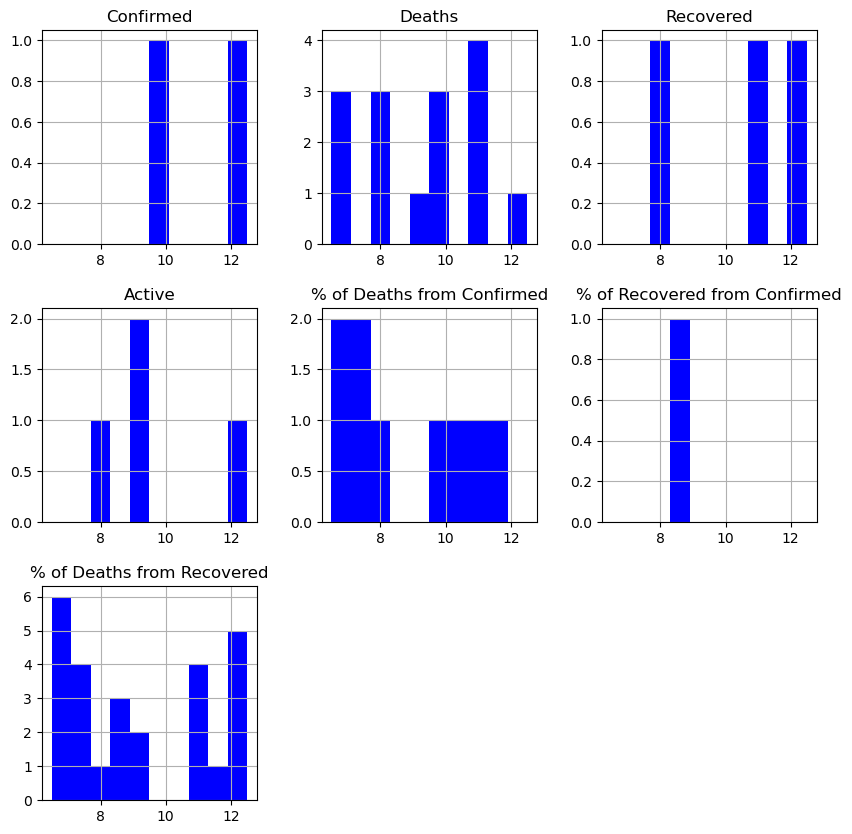

In [140]:
df.hist(bins=10,figsize= (10,10),range=[6.5, 12.5], color='blue')
plt.show()

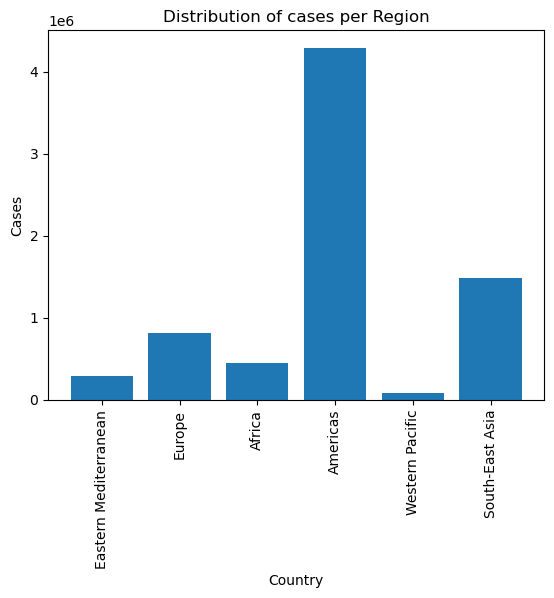

In [141]:
#Creates a bar chart of the top 15 countries who won the most medals
plt.bar(df['WHO Region'], df['Confirmed'])

#Making the title and Axis labels
plt.title("Distribution of cases per Region")
plt.xlabel("Country")
plt.ylabel("Cases")

#Making the x Axis more readable
plt.xticks(rotation= 90)
plt.show()


In [142]:
# CALCULATE COREELATION COEFFICIENTS FOR THE FOLLOWING VARIABLES

corr_matrix = df[["Confirmed", "Deaths", "Recovered", "Active",]].corr()

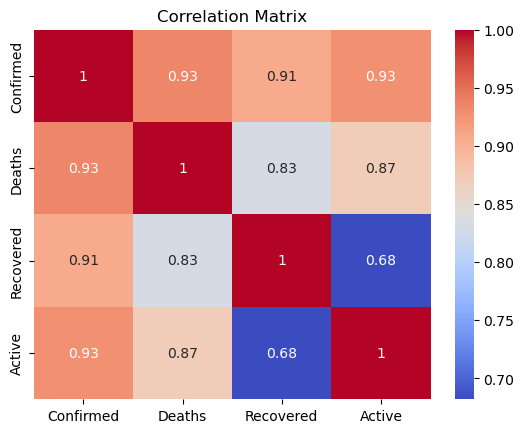

In [143]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

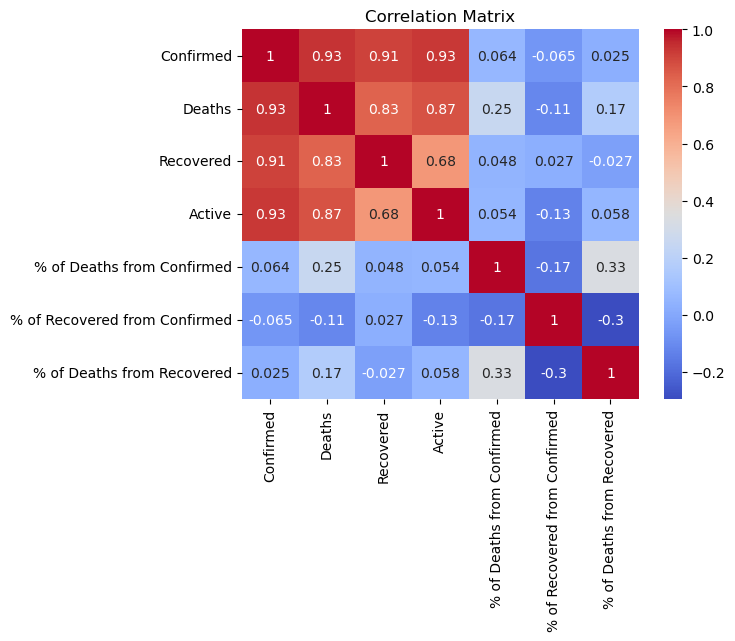

In [144]:
# Much Better!
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",linewidths=0)
plt.title("Correlation Matrix")
plt.show()

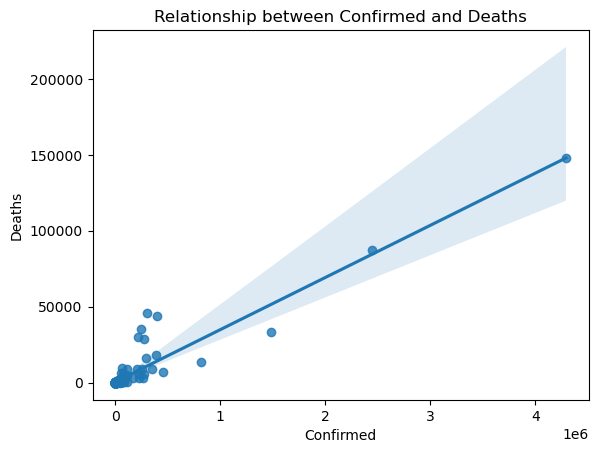

In [145]:
#Reg Plot 

sns.regplot(x="Confirmed", y="Deaths", data=df)
plt.title("Relationship between Confirmed and Deaths")
plt.show()

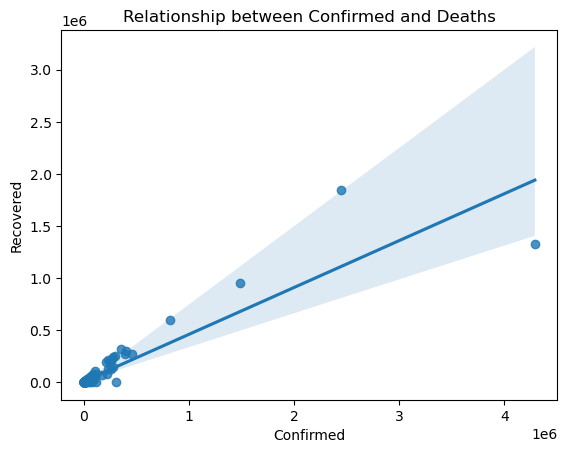

In [146]:
#Reg Plot 

sns.regplot(x="Confirmed", y="Recovered" ,data=df)
plt.title("Relationship between Confirmed and Deaths")
plt.show()

In [147]:
pd.set_option('display.float_format', lambda x: "%.3f"  %x)

In [148]:
# Create a pivot table of the average value by number of Confirmed and Deaths
pivot_table = pd.pivot_table(df, values='Confirmed', index='Deaths', aggfunc='mean')

# Print the pivot table
pivot_table

,Confirmed
Deaths,
0,101.000
1,158.000
2,638.333
3,113.500
4,116.000
...,...
35112,246286.000
44022,395489.000
45844,301708.000


####  The above data tells us that for every 1 death, there is 158 confirmed COVID 19 cases. It also shows for every 148,011 deaths due to COVID, there is 4,290,259. confirmed cases

# Step 4: Reduce the Data Dimension

# Step 5: Determine the Data Mining Task

### In this process we want to predict the number of confirmed cases per each country region. 
### One of the main benefits of predecting the number of confirmed cases for each region would be to help detect potential outbreaks earlier, which can allow health authorities to respond quickly and prevent the spread of the disease.

# Step 6: Partition the Data (supervised tasks only)


In [149]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       '% of Deaths from Confirmed', '% of Recovered from Confirmed',
       '% of Deaths from Recovered', 'WHO Region'],
      dtype='object')

In [161]:
df = df.reset_index()

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [152]:
print ("Dataset Data Types")
print(df.dtypes)

Dataset Data Types
index                              int64
Country/Region                    object
Confirmed                          int64
Deaths                             int64
Recovered                          int64
Active                             int64
% of Deaths from Confirmed       float64
% of Recovered from Confirmed    float64
% of Deaths from Recovered       float64
WHO Region                        object
dtype: object


In [153]:
# Convert WHO Region to Numeric b/c we need all variables to be numberic for modeling
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit and transform the categorical variable
df['WHO Region'] = le.fit_transform(df['WHO Region'])
df['Country/Region'] = le.fit_transform(df['Country/Region'])

In [183]:
# Split the data into training and testing sets
x = df[['Deaths', 'Recovered', 'Active', '% of Deaths from Confirmed', '% of Recovered from Confirmed', '% of Deaths from Recovered','WHO Region','Country/Region']]
y = df[['Confirmed']]

In [184]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(38, 8)
(149, 8)
(38, 1)
(149, 1)


# Step 7 & 8: Choose & implement the data mining technique to be used


In [185]:

X = df.values.astype(np.float)

# check for NaN values
print(np.any(np.isnan(X)))

# check for infinity values
print(np.any(np.isinf(X)))

False
False


C:\Users\alfon\AppData\Local\Temp\ipykernel_22188\3315668644.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = df.values.astype(np.float)


In [174]:
# replace infinity with a specific value, such as 999
df.replace([np.inf, -np.inf], 999, inplace=True)
df.head()

,level_0,index,Country/Region,Confirmed,Deaths,Recovered,Active,% of Deaths from Confirmed,% of Recovered from Confirmed,% of Deaths from Recovered,WHO Region
0,0,0,0,36263,1269,25198,9796,3.500,69.490,5.040,2
1,1,1,1,4880,144,2745,1991,2.950,56.250,5.250,3
2,2,2,2,27973,1163,18837,7973,4.160,67.340,6.170,0
3,3,3,3,907,52,803,52,5.730,88.530,6.480,3
4,4,4,4,950,41,242,667,4.320,25.470,16.940,0


In [175]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,level_0,index,Country/Region,Confirmed,Deaths,Recovered,Active,% of Deaths from Confirmed,% of Recovered from Confirmed,% of Deaths from Recovered,WHO Region
0,0.000,0.000,0.000,36263.000,1269.000,25198.000,9796.000,3.500,69.490,5.040,2.000
1,1.000,1.000,1.000,4880.000,144.000,2745.000,1991.000,2.950,56.250,5.250,3.000
2,2.000,2.000,2.000,27973.000,1163.000,18837.000,7973.000,4.160,67.340,6.170,0.000
3,3.000,3.000,3.000,907.000,52.000,803.000,52.000,5.730,88.530,6.480,3.000
4,4.000,4.000,4.000,950.000,41.000,242.000,667.000,4.320,25.470,16.940,0.000
...,...,...,...,...,...,...,...,...,...,...,...
182,182.000,182.000,182.000,10621.000,78.000,3752.000,6791.000,0.730,35.330,2.080,2.000
183,183.000,183.000,183.000,10.000,1.000,8.000,1.000,10.000,80.000,12.500,0.000
184,184.000,184.000,184.000,1691.000,483.000,833.000,375.000,28.560,49.260,57.980,2.000
185,185.000,185.000,185.000,4552.000,140.000,2815.000,1597.000,3.080,61.840,4.970,0.000


In [176]:
X = df.values.astype(np.float)

# check for NaN values
print(np.any(np.isnan(X)))

# check for infinity values
print(np.any(np.isinf(X)))

False
False


C:\Users\alfon\AppData\Local\Temp\ipykernel_22188\2808075481.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = df.values.astype(np.float)


In [186]:
# CREATE the linear regression model
model = LinearRegression()

# FIT the model to the training data
model.fit(x_train, y_train)


LinearRegression()

In [187]:
# PREDICT on the test data
y_pred = model.predict(x_test)

y_pred

array([[4.55200e+03],
       [1.85400e+03],
       [2.65000e+02],
       [4.59020e+04],
       [7.93950e+04],
       [6.72510e+04],
       [1.20000e+01],
       [4.52529e+05],
       [3.43900e+03],
       [6.70960e+04],
       [2.80500e+03],
       [1.56550e+04],
       [7.23500e+03],
       [2.26000e+02],
       [8.11610e+04],
       [6.64280e+04],
       [5.09000e+02],
       [3.01708e+05],
       [2.46286e+05],
       [9.90000e+01],
       [4.11800e+04],
       [1.84300e+03],
       [8.60000e+01],
       [1.14000e+02],
       [1.41000e+02],
       [2.08700e+03],
       [2.05580e+04],
       [8.16680e+05],
       [5.02990e+04],
       [3.44770e+04],
       [1.77000e+03],
       [2.27019e+05],
       [3.97410e+04],
       [3.36240e+04],
       [1.40000e+01],
       [3.47923e+05],
       [5.05000e+02],
       [2.68934e+05]])

In [188]:
# Calculation for the R-squared value
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

R-squared value: 1.0


In [180]:
#Performance Metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# Calculate the residuals by subtracting the predicted values from the actual values
residuals = y_test - y_pred
# Calculate the Mean Error (Average Error)
me = sum(residuals) / len(residuals)
print("Mean Error:", me)
# Calculation mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)
# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean squared error:", rmse)
# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculate the Mean Percentage Error
mpe =  100 * sum(residuals / y_test) / len(residuals)
print("Mean Percentage Error:", mpe)
# Calculate the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape*100)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [181]:
# Running linear regression model on training dataset using statsmodels
import statsmodels.api as sm
# Add a constant to get an intercept - you must do this!
x_train_sm = sm.add_constant(x_train)
# Fit the resgression line using ‘OLS’
lr = sm.OLS(y_train, x_train_sm).fit()

In [182]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.482e+30
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:41:10   Log-Likelihood:                 2921.0
No. Observations:                 149   AIC:                            -5826.
Df Residuals:                     141   BIC:                            -5802.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         